<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Covid19_training_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from cv2 import cvtColor
from google.colab.patches import cv2_imshow
import csv


In [0]:
df_teste = pd.read_csv('/content/mpi_roof_2019a.csv', encoding= 'unicode_escape')

In [35]:
df_teste.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.8,9.98,9.07,0.92,5.64,9.04,1243.74,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.5,9.99,9.04,0.95,5.62,9.01,1243.47,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.1,10.01,9.02,0.99,5.61,8.99,1243.18,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.7,10.02,8.99,1.03,5.59,8.96,1243.01,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.1,10.03,8.93,1.09,5.56,8.91,1242.80,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4


In [0]:
# Opening GDP per Country
countries = []
gdplista = []
countryline = []
count = 0
path = 'SYB62_230_201904_GDP and GDP Per Capita_2017_utf8.csv'
with open (path, mode='r') as f:
  reader = csv.reader(f, delimiter="\t")
  for i, line in enumerate(reader):
    if i == 0:
      continue  # Skips the first line
    line_i = line[0].split(',')
    
    if line_i[0]!='United Rep. of Tanzania':
      count += 1
      gdplista.append(float(line_i[3]))

      if count==4:
        count=0
        countryline.append(line_i[0])
        countryline.append(gdplista[0])
        countryline.append(gdplista[1])
        countryline.append(gdplista[3])
        countryline.append(gdplista[2])
        countries.append(countryline)
        countryline=[]
        gdplista = []

In [37]:
countries  # Country, GDP Gross, GDP per capita, growth rate, average age

[['Total all countries or areas', 80501414.0, 10665.0, 3.1, 25.0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9],
 ['Albania', 13039.0, 4.45, 3.8, 32.9],
 ['Algeria', 167555.0, 4055.0, 1.4, 28.1],
 ['Andorra', 3013.0, 39153.0, 1.7, 44.3],
 ['Angola', 126506.0, 4247.0, -2.5, 15.9],
 ['Anguilla', 281.0, 18861.0, -7.7, 34.8],
 ['Antigua and Barbuda', 1.51, 14803.0, 3.0, 31.9],
 ['Argentina', 637486.0, 14.4, 2.9, 31.7],
 ['Armenia', 11537.0, 3937.0, 7.5, 35.1],
 ['Aruba', 2701.0, 25655.0, 1.3, 39.3],
 ['Australia', 1408676.0, 57613.0, 2.9, 38.7],
 ['Austria', 416836.0, 47718.0, 2.6, 44.0],
 ['Azerbaijan', 40749.0, 4146.0, 0.1, 31.3],
 ['Bahamas', 11792.0, 29825.0, 1.8, 32.0],
 ['Bahrain', 35326.0, 23668.0, 3.8, 32.3],
 ['Bangladesh', 245633.0, 1492.0, 7.3, 26.7],
 ['Barbados', 4713.0, 16494.0, 0.9, 38.6],
 ['Belarus', 54441.0, 5.75, 2.4, 40.0],
 ['Belgium', 494764.0, 43289.0, 1.7, 41.4],
 ['Belize', 1902.0, 5077.0, 0.5, 22.7],
 ['Benin', 9236.0, 826.0, 5.0, 18.2],
 ['Bermuda', 6269.0, 102192

In [0]:
df_countries_specs = pd.DataFrame(countries, columns = ['country' , 'gdp_gross', 'gdp_p_capita', 'growth_rate', 'average_age']) 

In [39]:
df_countries_specs.head()

,country,gdp_gross,gdp_p_capita,growth_rate,average_age
0,Total all countries or areas,80501414.0,10665.00,3.1,25.0
1,Afghanistan,21993.0,619.00,2.5,18.9
2,Albania,13039.0,4.45,3.8,32.9
3,Algeria,167555.0,4055.00,1.4,28.1
4,Andorra,3013.0,39153.00,1.7,44.3


In [0]:
path = '/content/full_data_covid19.csv'
with open (path, mode='r') as f:
  reader = csv.reader(f, delimiter="\t")
  country = ''
  data = []
  dataline = []
  # data list will be like: 
  # Country, Day, NewCases, NewDeaths, TotalCases, TotalDeaths
  # 1,'2020-01-25', 'United States', 5374, 110, 19624, 260

  # First let's erase the empty rows and set the index
  country = ''
  data = []
  dataline = []
  for i, line in enumerate(reader):
    line_i = line[0].split(',')
    if (line_i[1] != country):  # IF Country is read for the first time resets de day counter
      country = line_i[1]
      day = 0
    if (line_i[4] != '0' and line_i[4] != 'total_cases'):  # IF Total Cases != Zero
      day+=1
      dataline.append(line_i[1])  # country
      dataline.append(day)  #day
      # dataline.append(line_i[0]) - delete the # if you want the date also
      dataline.append(int(line_i[2]))  # NewCases
      dataline.append(int(line_i[3]))  # NewDeaths
      dataline.append(int(line_i[4]))  # TotalCases
      dataline.append(int(line_i[5]))  # TotalDeaths
      data.append(dataline)
      dataline = []

In [41]:
data

[['Afghanistan', 1, 1, 0, 1, 0],
 ['Afghanistan', 2, 0, 0, 1, 0],
 ['Afghanistan', 3, 0, 0, 1, 0],
 ['Afghanistan', 4, 0, 0, 1, 0],
 ['Afghanistan', 5, 0, 0, 1, 0],
 ['Afghanistan', 6, 0, 0, 1, 0],
 ['Afghanistan', 7, 0, 0, 1, 0],
 ['Afghanistan', 8, 3, 0, 4, 0],
 ['Afghanistan', 9, 3, 0, 7, 0],
 ['Afghanistan', 10, 3, 0, 10, 0],
 ['Afghanistan', 11, 6, 0, 16, 0],
 ['Afghanistan', 12, 5, 0, 21, 0],
 ['Afghanistan', 13, 1, 0, 22, 0],
 ['Afghanistan', 14, 0, 0, 22, 0],
 ['Afghanistan', 15, 0, 0, 22, 0],
 ['Afghanistan', 16, 2, 0, 24, 0],
 ['Afghanistan', 17, 0, 0, 24, 0],
 ['Afghanistan', 18, 10, 0, 34, 0],
 ['Afghanistan', 19, 6, 1, 40, 1],
 ['Afghanistan', 20, 2, 0, 42, 1],
 ['Afghanistan', 21, 33, 0, 75, 1],
 ['Afghanistan', 22, 0, 0, 75, 1],
 ['Afghanistan', 23, 16, 1, 91, 2],
 ['Afghanistan', 24, 15, 1, 106, 3],
 ['Afghanistan', 25, 8, 1, 114, 4],
 ['Afghanistan', 26, 27, 0, 141, 4],
 ['Afghanistan', 27, 25, 0, 166, 4],
 ['Albania', 1, 2, 0, 2, 0],
 ['Albania', 2, 4, 0, 6, 0],
 ['Al

In [0]:
df_covid_spread = pd.DataFrame(data, columns = ['country' , 'day', 'newCases', 'newDeaths', 'totalCases', 'totalDeaths']) 

In [43]:
df_covid_spread.head()

,country,day,newCases,newDeaths,totalCases,totalDeaths
0,Afghanistan,1,1,0,1,0
1,Afghanistan,2,0,0,1,0
2,Afghanistan,3,0,0,1,0
3,Afghanistan,4,0,0,1,0
4,Afghanistan,5,0,0,1,0


In [0]:
df_full = pd.merge(df_countries_specs,df_covid_spread,on='country')

In [45]:
df_full

,country,gdp_gross,gdp_p_capita,growth_rate,average_age,day,newCases,newDeaths,totalCases,totalDeaths
0,Afghanistan,21993.0,619.0,2.5,18.9,1,1,0,1,0
1,Afghanistan,21993.0,619.0,2.5,18.9,2,0,0,1,0
2,Afghanistan,21993.0,619.0,2.5,18.9,3,0,0,1,0
3,Afghanistan,21993.0,619.0,2.5,18.9,4,0,0,1,0
4,Afghanistan,21993.0,619.0,2.5,18.9,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4586,Zimbabwe,20.0,1091.0,3.0,15265.0,8,2,0,5,1
4587,Zimbabwe,20.0,1091.0,3.0,15265.0,9,2,0,7,1
4588,Zimbabwe,20.0,1091.0,3.0,15265.0,10,0,0,7,1
4589,Zimbabwe,20.0,1091.0,3.0,15265.0,11,0,0,7,1


In [0]:
df_full_list = [df_full.columns.values.tolist()] + df_full.values.tolist()

In [47]:
df_full_list

[['country',
  'gdp_gross',
  'gdp_p_capita',
  'growth_rate',
  'average_age',
  'day',
  'newCases',
  'newDeaths',
  'totalCases',
  'totalDeaths'],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 1, 1, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 2, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 3, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 4, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 5, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 6, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 7, 0, 0, 1, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 8, 3, 0, 4, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 9, 3, 0, 7, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 10, 3, 0, 10, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 11, 6, 0, 16, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 12, 5, 0, 21, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 13, 1, 0, 22, 0],
 ['Afghanistan', 21993.0, 619.0, 2.5, 18.9, 14, 0, 0, 22, 0]

In [48]:
df_full_list[0]

['country',
 'gdp_gross',
 'gdp_p_capita',
 'growth_rate',
 'average_age',
 'day',
 'newCases',
 'newDeaths',
 'totalCases',
 'totalDeaths']

In [49]:
max = 0.0
for i in range(len(df_full_list)):
  if i != 0:
    if df_full_list[i][5] > max:
      max = df_full_list[i][5]
max

93

In [0]:
i = 1
df_full_lista_ordered = []
for i in range(max + 1):
  df_full_sublist = []
  for j in range(len(df_full_list)):
    if df_full_list[j][5] != 'day':
      if df_full_list[j][5] == i:
          df_full_sublist.append(df_full_list[j])
  if i != 0:
    df_full_lista_ordered.append(df_full_sublist)

In [62]:
df_full_lista_ordered[60]

[['Australia', 1408676.0, 57613.0, 2.9, 38.7, 61, 600, 1, 2423, 8],
 ['Canada', 1647120.0, 44974.0, 3.0, 42.2, 61, 1426, 8, 3385, 35],
 ['China', 12237782.0, 8682.0, 6.9, 37.4, 61, 428, 47, 79355, 2837],
 ['France', 260631.0, 2.8, 38415.0, 41.4, 61, 2446, 240, 22302, 1100],
 ['Germany', 15923.0, 4.8, 44976.0, 47.1, 61, 6294, 72, 48582, 325],
 ['India', 17507.0, 4.0, 1923.0, 28.1, 61, 180, 3, 1251, 32],
 ['Italy', 300.48, 3.5, 32747.0, 45.5, 61, 4050, 810, 101739, 11591],
 ['Japan', 13972.0, 1.0, 38.22, 47.3, 61, 43, 1, 780, 22],
 ['Malaysia', 9122.0, 5.1, 9951.0, 28.5, 61, 172, 4, 1796, 19],
 ['Singapore', 3497.0, 3.8, 56737.0, 34.6, 61, 54, 0, 509, 2],
 ['Spain', 1314314.0, 28354.0, 3.0, 42.7, 61, 9222, 849, 94417, 8189],
 ['Sweden', 535607.0, 54043.0, 2.1, 41.2, 61, 407, 34, 4435, 180],
 ['Thailand', 455303.0, 6595.0, 3.9, 37.7, 61, 35, 0, 212, 1],
 ['United Kingdom', 2631228.0, 39758.0, 1.7, 40.5, 61, 2619, 180, 22141, 1408],
 ['United States', 38.1, 60055.0, 2.2, 17348626.0, 61, 53

In [0]:
df_brazil = df_full[df_full['country']=='Brazil']
df_eua = df_full[df_full['country']=='United States']
df_china = df_full[df_full['country']=='China']
df_india = df_full[df_full['country']=='India']
df_4 = pd.concat([df_brazil,df_eua,df_china,df_india])

In [53]:
df_brazil.head()

,country,gdp_gross,gdp_p_capita,growth_rate,average_age,day,newCases,newDeaths,totalCases,totalDeaths
587,Brazil,2055512.0,9821.0,1.0,32.6,1,1,0,1,0
588,Brazil,2055512.0,9821.0,1.0,32.6,2,0,0,1,0
589,Brazil,2055512.0,9821.0,1.0,32.6,3,0,0,1,0
590,Brazil,2055512.0,9821.0,1.0,32.6,4,0,0,1,0
591,Brazil,2055512.0,9821.0,1.0,32.6,5,1,0,2,0


In [0]:
df_brazil.index = np.arange(1, len(df_brazil)+1)
df_eua.index = np.arange(1, len(df_eua)+1)

In [55]:
df_brazil.head()

,country,gdp_gross,gdp_p_capita,growth_rate,average_age,day,newCases,newDeaths,totalCases,totalDeaths
1,Brazil,2055512.0,9821.0,1.0,32.6,1,1,0,1,0
2,Brazil,2055512.0,9821.0,1.0,32.6,2,0,0,1,0
3,Brazil,2055512.0,9821.0,1.0,32.6,3,0,0,1,0
4,Brazil,2055512.0,9821.0,1.0,32.6,4,0,0,1,0
5,Brazil,2055512.0,9821.0,1.0,32.6,5,1,0,2,0


In [102]:
df_china.tail()

,country,gdp_gross,gdp_p_capita,growth_rate,average_age,day,newCases,newDeaths,totalCases,totalDeaths
972,China,12237782.0,8682.0,6.9,37.4,89,119,3,81946,3299
973,China,12237782.0,8682.0,6.9,37.4,90,113,5,82059,3304
974,China,12237782.0,8682.0,6.9,37.4,91,98,2,82157,3306
975,China,12237782.0,8682.0,6.9,37.4,92,84,3,82241,3309
976,China,12237782.0,8682.0,6.9,37.4,93,54,1,82295,3310


In [0]:
# ------------------------START THE MFKING MODEL FROM NOW ON   ------------------------
# ------------------------------------------------------------------------------------- #

In both the following tutorials, the first 55 rows of the data will be the training dataset, and there remaining will be the validation dataset.

In [0]:
TRAIN_SPLIT = 90

In [0]:
tf.random.set_seed(5)

Part 1: Forecast a univariate time series
First, you will train a model using only a single feature (totalDeaths), and use it to make predictions for that value in the future.

Let's first extract only the Total Deaths from the dataset.
uni_data = df_eua['totalDeaths']
uni_data.index = df_eua['day']
uni_data.tail()

In [105]:
uni_data = df_china['totalDeaths']
uni_data.index = df_china['day']
uni_data.tail()

day
89    3299
90    3304
91    3306
92    3309
93    3310
Name: totalDeaths, dtype: int64

Let's observe how this data looks across time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd83728198>],
      dtype=object)

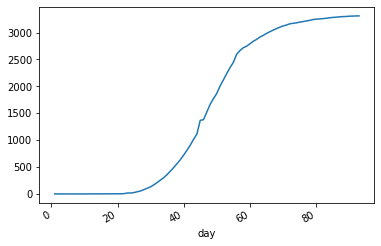

In [106]:
uni_data.plot(subplots=True)

In [0]:
uni_data = uni_data.values

It is important to scale features before training a neural network. Standardization is a common way of doing this scaling by subtracting the mean and dividing by the standard deviation of each feature.You could also use a `tf.keras.utils.normalize` method that rescales the values into a range of [0,1].

Note: The mean and standard deviation should only be computed using the training data.

In [0]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

Let's standardize the data.

In [0]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [0]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

Let's now create the data for the univariate model. For part 1, the model will be given the last 20 recorded temperature observations, and needs to learn to predict the temperature at the next time step. 

In [0]:
univariate_past_history = 85
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

This is what the `univariate_data` function returns.

In [114]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10326498]
 [-1.10254253]
 [-1.10254253]
 [-1.10254253]
 [-1.10254253]
 [-1.10182007]
 [-1.10182007]
 [-1.10182007]
 [-1.10182007]
 [-1.10109762]
 [-1.10109762]
 [-1.09893026]
 [-1.09098329]
 [-1.09098329]
 [-1.08448122]
 [-1.07364443]
 [-1.06280765]
 [-1.04474634]
 [-1.02668503]
 [-1.00790127]
 [-0.98044808]
 [-0.94938263]
 [-0.91614983]
 [-0.88363947]
 [-0.84245969]
 [-0.79550029]
 [-0.74781843]
 [-0.69580186]
 [-0.64306284]
 [-0.58093194]
 [-0.51663369]
 [-0.44655581]
 [-0.36853096]
 [-0.29845308]
 [-0.11495019]
 [-0.10555831]
 [-0.00224763]
 [ 0.1003406 ]
 [ 0.1761981 ]
 [ 0.24699842]
 [ 0.3474193 ]
 [ 0.42833396]
 [ 0.51358333]
 [ 0.59233064]
 [ 0.66313097]
 [ 0.77149881]
 [ 0.82207048]
 [ 0.859638  ]
 [ 0.88058912]
 [ 0.91237702]
 [ 0.94633228]
 [ 0.97161811]
 [ 1.00196111]
 [ 1.02507958]
 [ 1.05181

Now that the data has been created, let's take a look at a single example. The information given to the network is given in blue, and it must predict the value at the red cross.

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

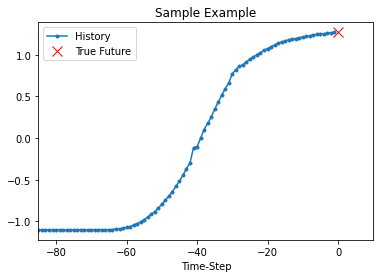

In [117]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

### Baseline
Before proceeding to train a model, let's first set a simple baseline. Given an input point, the baseline method looks at all the history and predicts the next point to be the average of the last x observations.

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

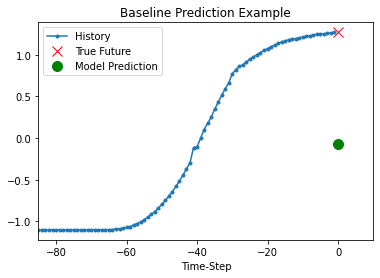

In [120]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

Let's see if you can beat this baseline using a recurrent neural network.

### Recurrent neural network

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state summarizing the information they've seen so far. For more details, read the [RNN tutorial](https://www.tensorflow.org/tutorials/sequences/recurrent). In this tutorial, you will use a specialized RNN layer called Long Short Term Memory ([LSTM](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/LSTM))

Let's now use `tf.data` to shuffle, batch, and cache the dataset.

In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

The following visualisation should help you understand how the data is represented after batching.

![Time Series](images/time_series.png)

You will see the LSTM requires the input shape of the data it is being given.

In [0]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

Let's make a sample prediction, to check the output of the model. 

In [0]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

Let's train the model now. Due to the large size of the dataset, in the interest of saving time, each epoch will only run for 200 steps, instead of the complete training data as normally done.

In [133]:
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS, steps_per_epoch=80, validation_steps=50)

Epoch 1/10
80/80 [==============================] - 1s 19ms/step - loss: 9.1459e-04
Epoch 2/10
80/80 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 3/10
80/80 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 4/10
80/80 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 5/10
80/80 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 6/10
80/80 [==============================] - 2s 19ms/step - loss: 0.0013
Epoch 7/10
80/80 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 8/10
80/80 [==============================] - 2s 19ms/step - loss: 0.0013
Epoch 9/10
80/80 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 10/10
80/80 [==============================] - 1s 19ms/step - loss: 0.0013


#### Predict using the simple LSTM model
Now that you have trained your simple LSTM, let's try and make a few predictions.

In [0]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

# #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

This looks better than the baseline. Now that you have seen the basics, let's move on to part two, where you will work with a multivariate time series.

In [0]:
import plotly.express as px
import plotly.graph_objects as go

#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [58]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_brazil['day'], y = df_brazil['totalCases'], mode='lines+markers',name='totalCases'))
fig.update_layout(title_text='Trend of Coronavirus Cases Brazil (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)', height=400)
fig.show()


In [59]:
fig = px.scatter(df_4, x="day", y="totalCases", facet_col="country", height=400)
fig.update_layout(
    margin=dict(l=10, r=10, t=10, b=10),
    paper_bgcolor="LightSteelBlue")
fig.show()

In [60]:
df = px.data.gapminder()
fig = px.area(df_4, x="day", y="totalCases", color="country", line_group="country")
fig.show()

In [61]:

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(df_brazil, x="day", y="totalCases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Brazil on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()